## Part 4 
Back propagation through a neuron

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
class Value:
    
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        # this variable maintains the derivative of it with respect to that value
        self.grad = 0.0
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, input):
        output = Value(self.data + input.data, (self, input), '+')
        return output
    
    def __mul__(self, input):
        output = Value(self.data * input.data, (self, input), '*')
        return output
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

In [12]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad,), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [13]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [14]:
d.grad = -2.0
f.grad = 4
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

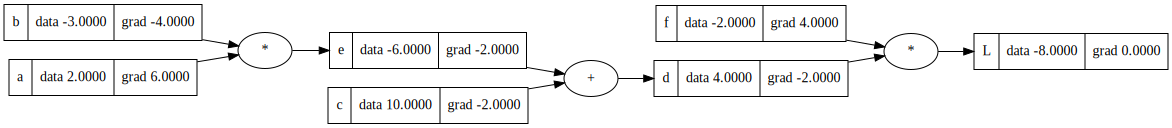

In [15]:
draw_dot(L)

## start

Lets graph the **activation function** (aka squashing function). It could be a `sigmoid` or `tanh`. In our case we use `tanh`.

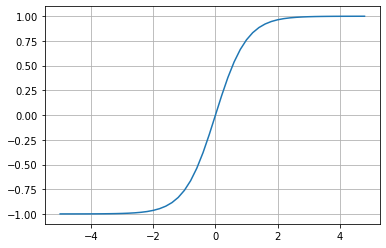

In [26]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [85]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n' # n is the sum
o = n.tanh(); o.label = 'o'

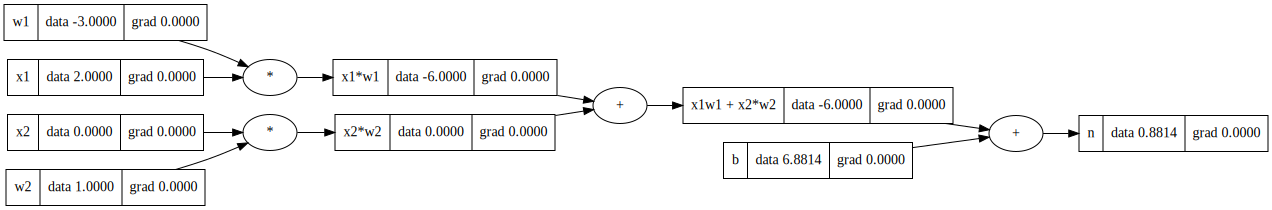

In [86]:
draw_dot(n)

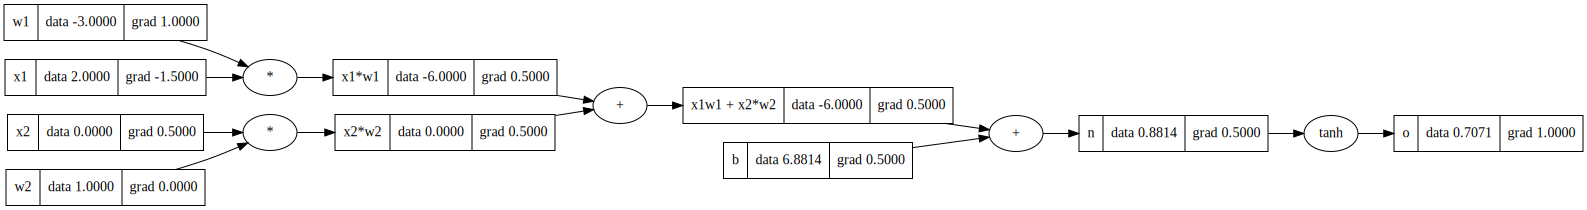

In [95]:
draw_dot(o)

In [88]:
o.grad = 1.0

So we know from wikipedia that `do/dn = 1 - tanh(n)**2`
We now that `o = tanh(n)`
Therefore, `dn/dn = 1 - o**2`

In [89]:
1 - o.data**2

0.4999999999999999

In [90]:
# therfore
n.grad = 0.5

In [91]:
# becase the '+' is just a distributor of a gradient
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

In [92]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [94]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

Min 1:08